<img src="image/0.PNG" width="1000" height="200">

# Building Recommendation Systems in Python

**Date:** June 03, 2022 

**Presenter:** Shaghayegh Sadeghi

## workshop description
In this course, students will learn everything they need to know to create their own recommendation engine. Through hands-on exercises, students will get to grips with the two most common systems, collaborative filtering, and content-based filtering. Next, students will learn how to measure similarities like the Jaccard distance and cosine similarity, and how to evaluate the quality of recommendations on test data using the root mean square error (RMSE).

**Learning Objectives/Outcomes:** By the end of this course, students will have built their very own movie recommendation engine and be able to apply their Python skills to create these systems for any industry.
<img src="image/c1.PNG" width="1000" height="200">

<img src="https://files.realpython.com/media/Build-a-Recommendation-Engine-With-Collaborative-Filtering_Watermarked.451abc4ecb9f.jpg" width="500" height="500">


 **Impact of Recommender systems:**
 
 40% of apps installed in Google Play
 
 60% of watch time in YouTube
 
 35% of purchases in Amzaon
 
 75% of movies watched on NETFLIX
 
 ### What are recommendation engines?
 
 <img src="image/1.PNG" width="500" height="100">

### What kind of data do I need?

Recommendation engines use the feedback of users to find new relevant items for them or for others with the assumption that users who have similar preferences in the past are likely to have similar preferences in the future like the example here. Recommendation engines benefit from having a many to many match between the users giving the feedback, and the items receiving the feedback. In other words, a better recommendation can be made for an item that has been given a lot of feedback, and more personalized recommendations can be given for a user that has given a lot of feedback.

  <img src="image/4.PNG" width="500" height="100">

  <img src="image/2.PNG" width="500" height="100">

 
### What are recommendation engines useful for?
**Recommendation Engines**

What movie should a viewer watch?

Will a diner enjoy a restaurant?

**Other Statistical Models**

Will a movie sell a lot of tickets?

How much is a house worth?


  <img src="image/3.PNG" width="1000" height="200">


**Exercise 1:** https://jamboard.google.com/d/1eOtXe0g5oBX1cUb2PQpJItDWH4ZAZTp91Crwyo7yr20/edit?usp=sharing 
<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Implicit vs. explicit data
listening_history_df=pd.read_csv('listening_history.csv')
# Inspect the listening_history_df DataFrame
print(listening_history_df.head())

       User            Song Title  Skipped Track  Rating
0  User_001  Like a Rolling Stone           True       6
1  User_001               Imagine          False       2
2  User_001       What's Going On          False       9
3  User_002               Respect          False       6
4  User_003       Good Vibrations           True       0


In [3]:
# Calculate the number of unique values
print(listening_history_df[['Rating', 'Skipped Track']].nunique())


Rating           11
Skipped Track     2
dtype: int64


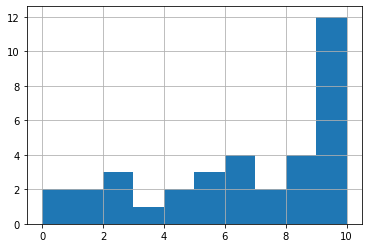

In [4]:
# Display a histogram of the values in the Rating column
listening_history_df['Rating'].hist()
plt.show()

**Question**

Which of its columns would be considered explicit data.

## Non-personalized recommendations
They are made to all users, without taking their preferences into account.
<img src="image/5.PNG" width="800" height="200">

#### Finding the most popular items
`book_df` DataFrame:
<img src="image/6.PNG" width="400" height="100">
```python
book_df['book'].value_counts()
```
<img src="image/7.PNG" width="500" height="100">

```python
print(book_df.value_counts().index)
```
<img src="image/8.PNG" width="500" height="100">

#### Finding the most liked items
`user_ratings` DataFrame:
<img src="image/9.PNG" width="500" height="100">

```python
avg_rating_df = user_ratings[["book", "rating"]].groupby(['book']).mean()
avg_rating_df.head()
```
<img src="image/10.PNG" width="500" height="100">

```python
sorted_avg_rating_df = avg_rating_df.sort_values(by="rating", ascending=False)
sorted_avg_rating_df.head()
```
<img src="image/11.PNG" width="500" height="100">

#### Finding the most liked popular items
```python
book_frequency = user_ratings["book"].value_counts()
print(book_frequency)
```
<img src="image/12.PNG" width="500" height="100">

```python
frequently_reviewed_books = book_frequency[book_frequency > 100].index
print(frequently_reviewed_books)
```
<img src="image/13.PNG" width="500" height="100">

```python
frequent_books_df = user_ratings_df[user_ratings_df["book"].isin(frequently_reviewed_books)]
frequent_books_avgs = frequently_reviewed_books[["title", "rating"]].groupby('title').mean()
print(frequent_books_avgs.sort_values(by="rating", ascending=False).head())
```
<img src="image/14.PNG" width="500" height="100">

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** what is the most frequently watched movie overall in `user_rating` dataset?

In [5]:
user_ratings_df=pd.read_csv('user_ratings.csv')
user_ratings_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [6]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()
movie_popularity

Forrest Gump (1994)                              329
Shawshank Redemption, The (1994)                 317
Pulp Fiction (1994)                              307
Silence of the Lambs, The (1991)                 279
Matrix, The (1999)                               278
                                                ... 
Geostorm (2017)                                    1
Barefoot Contessa, The (1954)                      1
Passenger, The (Professione: reporter) (1975)      1
Ernest Goes to Jail (1990)                         1
To Live and Die in L.A. (1985)                     1
Name: title, Length: 9719, dtype: int64

In [7]:
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object')


**Exercise:** you should find the average rating of each movie in the dataset, and then find the movie with the highest average rating.

In [8]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


**Exercise:** you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.

In [9]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Knocked Up (2007)', 'X-Men: The Last Stand (2006)',
       'Million Dollar Baby (2004)', 'The Devil's Advocate (1997)',
       'Bad Boys (1995)', 'Blow (2001)', 'Army of Darkness (1993)',
       'Splash (1984)', 'Training Day (2001)', 'Mulholland Drive (2001)'],
      dtype='object', length=437)


In [10]:
# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)

       userId  movieId  rating   timestamp                 title  \
0           1        1     4.0   964982703      Toy Story (1995)   
1           5        1     4.0   847434962      Toy Story (1995)   
2           7        1     4.5  1106635946      Toy Story (1995)   
3          15        1     2.5  1510577970      Toy Story (1995)   
4          17        1     4.5  1305696483      Toy Story (1995)   
...       ...      ...     ...         ...                   ...   
79246     603     1997     4.0   953925513  Exorcist, The (1973)   
79247     606     1997     3.0  1178911117  Exorcist, The (1973)   
79248     607     1997     5.0   963079420  Exorcist, The (1973)   
79249     608     1997     4.5  1117502891  Exorcist, The (1973)   
79250     610     1997     4.0  1479543021  Exorcist, The (1973)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1      Adventure|Animation|Children|Comedy|Fantasy  
2      Adventure|Animati

In [11]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


## Non-personalized suggestions

### Identifying pairs
<img src="image/15.PNG" width="500" height="100">

### Permutations versus combinations
<img src="image/16.PNG" width="500" height="100">

Books seen with `The Great Gatsby` -> `The Catcher in the Rye`

Books seen with `The Catcher in the Rye` -> `The Great Gatsby`
### Creating the pairing function
``` python
from itertools import permutations
def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)),
    columns=['book_a','book_b'])
return pairs
```
- `permutations(list, length_of_permutations))` Generates iterable object containing all permutations
- `list()` Converts this object to a usable list
- `pd.DataFrame()` Converts the list to a DataFrame containing the columns `book_a` and `book_b`

```python
#Applying the function to the data
book_pairs = book_df.groupby('userId')['book_title'].apply(create_pairs)
print(book_pairs.head())
```
<img src="image/17.PNG" width="500" height="100">

```python
#Cleaning up the results
book_pairs = book_pairs.reset_index(drop=True)
print(book_pairs.head())
```
<img src="image/18.PNG" width="500" height="100">

```python
#Counting the pairings
pair_counts = book_pairs.groupby(['book_a', 'book_b']).size()
pair_counts_df = pair_counts.to_frame(name = 'size').reset_index()
print(pair_counts_df.head())
```
<img src="image/20.PNG" width="500" height="100">

```python
#Looking up recommendations
pair_counts_sorted = pair_counts_df.sort_values('size', ascending=False)
pair_counts_sorted[pair_counts_sorted['book_a'] == 'Lord of the Rings']
```
<img src="image/21.PNG" width="500" height="100">


<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise** Work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

In [12]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs)

print(movie_combinations)

                         movie_a                           movie_b
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


In [13]:
# Apply the function to the title column and reset the index
movie_combinations = movie_combinations.reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


**Exercise:** Work with the movie_combinations DataFrame that you created in the last exercise, and generate a new DataFrame containing the counts of occurrences of each of the pairs within.

In [14]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
print(combination_counts.head())

movie_a     movie_b                                   
'71 (2014)  (500) Days of Summer (2009)                   1
            10 Cloverfield Lane (2016)                    1
            127 Hours (2010)                              1
            13 Assassins (Jûsan-nin no shikaku) (2010)    1
            13 Hours (2016)                               1
dtype: int64


In [15]:
# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

      movie_a                                     movie_b  size
0  '71 (2014)                 (500) Days of Summer (2009)     1
1  '71 (2014)                  10 Cloverfield Lane (2016)     1
2  '71 (2014)                            127 Hours (2010)     1
3  '71 (2014)  13 Assassins (Jûsan-nin no shikaku) (2010)     1
4  '71 (2014)                             13 Hours (2016)     1


**Exercise:** Making your first movie recommendations

In [16]:
# Sort the counts from highest to lowest
combination_counts_df=combination_counts_df.sort_values(by='size', ascending=False)

# Find the movies most frequently watched by people who watched Thor
ToyStory_df = combination_counts_df[combination_counts_df['movie_a'] == 'Toy Story (1995)']
ToyStory_df.head()

,movie_a,movie_b,size
24019673,Toy Story (1995),Forrest Gump (1994),154
24023000,Toy Story (1995),Pulp Fiction (1994),141
24023672,Toy Story (1995),"Shawshank Redemption, The (1994)",137
24024033,Toy Story (1995),Star Wars: Episode IV - A New Hope (1977),134
24021020,Toy Story (1995),Jurassic Park (1993),132


<img src="image/c2.PNG" width="1000" height="100">


## What are content-based recommendations?
we will move to more targeted models by recommending items based on their similarities to items a user has liked in the past. The recommendations made by finding items with similar attributes are called content-based recommendations.

<img src="image/22.PNG" width="500" height="100">

### Items' attributes or characteristics
A big advantage of using an item's attributes over user feedback is that you can make recommendations for any items you have attribute data on. This includes even brand new items that users have not seen yet. Content-based models require us to use any available attributes to build profiles of items in a way that allows us to mathematically compare between them. This allows us for example to find the most similar items and recommend them.

<img src="image/23.PNG" width="500" height="100">

### Vectorizing your attributes
This is best done by encoding each item as a vector. It is extremely valuable to have your data in this format so the distance and similarities between items can be easily calculated, which is vital for generating recommendations. 
<img src="image/24.PNG" width="500" height="100">
<img src="image/25.PNG" width="500" height="100">


### Crosstabulation

```python
pd.crosstab(book_genre_df['Book'], book_genre_df['Genre'])
```
<img src="image/26.PNG" width="500" height="100">


<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Excersie:** 
How many different movies are contained in `movie_genre_df`?

In [17]:
movie_genre_df=pd.read_csv('movie_genre.csv')
movie_genre_df

,name,genre_list
0,Toy Story,Adventure
1,Toy Story,Animation
2,Toy Story,Children
3,Toy Story,Comedy
4,Toy Story,Fantasy
5,Jumanji,Adventure
6,Jumanji,Children
7,Jumanji,Fantasy
8,Grumpier Old Men,Comedy
9,Grumpier Old Men,Romance


In [18]:
movie_genre_df['name'].nunique()

21

**Excersie:** Get the rows in `movie_genre_df` which have a name equal to Toy Story and save this as `toy_story_genres`.

In [19]:
# Select only the rows with values in the name column equal to Toy Story
toy_story_genres = movie_genre_df[movie_genre_df['name'] == 'Toy Story']

# Inspect the subset
print(toy_story_genres)

        name genre_list
0  Toy Story  Adventure
1  Toy Story  Animation
2  Toy Story   Children
3  Toy Story     Comedy
4  Toy Story    Fantasy


**Excersie:** Transform `movie_genre_df` to a table called `movie_cross_table`.

Assign the subset of `movie_cross_table` that contains Toy Story to the variable `toy_story_genres_ct` and inspect the results.

In [20]:
# Create cross-tabulated DataFrame from name and genre_list columns
movie_cross_table = pd.crosstab(movie_genre_df['name'], movie_genre_df['genre_list'])

# Select only the rows with Toy Story as the index
toy_story_genres_ct = movie_cross_table[movie_cross_table.index == 'Toy Story']
print(toy_story_genres_ct)

genre_list  Action  Adventure  Animation  Children  Comedy  Crime  Drama  \
name                                                                       
Toy Story        0          1          1         1       1      0      0   

genre_list  Fantasy  Horror  Romance  Thriller  
name                                            
Toy Story         1       0        0         0  


**Excersie:** Inspect the rows corresponding to 'Toy Story' and 'Jumanji' in movie_cross_table. How many genres do they have in common?

In [21]:
# Select only the rows with values in the name column equal to Toy Story
toy_story_genres = movie_genre_df[movie_genre_df['name'] == 'Jumanji']

# Create cross-tabulated DataFrame from name and genre_list columns
movie_cross_table = pd.crosstab(movie_genre_df['name'],movie_genre_df['genre_list'])

# Select only the rows with Toy Story as the index
toy_story_genres_ct = movie_cross_table[movie_cross_table.index == 'Jumanji']
print(toy_story_genres_ct)

genre_list  Action  Adventure  Animation  Children  Comedy  Crime  Drama  \
name                                                                       
Jumanji          0          1          0         1       0      0      0   

genre_list  Fantasy  Horror  Romance  Thriller  
name                                            
Jumanji           1       0        0         0  


## Making content-based recommendations
Jaccard similarity:

The Jaccard similarity is the ratio of attributes that two items have in common, divided by the total number of their combined attributes. These are respectively shown by the two orange shaded areas in the Venn diagrams here. It will always be between 0 and 1 and the more attributes the two items have in common, the higher the score.
<img src="image/27.PNG" width="500" height="100">


`genres_array_df` :
<img src="image/28.PNG" width="500" height="100">

### Calculating Jaccard similarity between books
```python
from sklearn.metrics import jaccard_score
hobbit_row = book_genre_df.loc['The Hobbit']
GOT_row = book_genre_df.loc['A Game of Thrones']
print(jaccard_score(hobbit_row, GOT_row))
```
answer: `0.25`

### Finding the distance between all items
```python
from scipy.spatial.distance import pdist, squareform
jaccard_distances = pdist(book_genre_df.values, metric='jaccard')
print(jaccard_distances)
```
answer:`[1. 0.5 1. 1. 0.5 1. ]`

```python
square_jaccard_distances = squareform(jaccard_distances)
print(square_jaccard_distances)
```
answer:
```python
[[0. 1. 0.5 1. ]
[1. 0. 1. 0.5]
[0.5 1. 0. 1. ]
[1. 0.5 1. 0. ]]```

```python
jaccard_similarity_array = 1 - square_jaccard_distances
print(jaccard_similarity_array)

answer:
[[1. 0. 0.5 0. ]
[0. 1. 0. 0.5]
[0.5 0. 1. 0. ]
[0. 0.5 0. 1. ]]
```
### Creating a usable distance table
```python
distance_df = pd.DataFrame(jaccard_similarity_array,
index=genres_array_df['Book'],
columns=genres_array_df['Book'])
distance_df.head()
```
<img src="image/29.PNG" width="500" height="100">


```python
print(distance_df['The Hobbit']['A Game of Thrones'])
```
answer: `0.75`

```python
print(distance_df['The Hobbit']['The Great Gatsby'])
```
answer: `0.15`

### Finding the most similar books
```python
print(distance_df['The Hobbit'].sort_values(ascending=False))
```
<img src="image/30.PNG" width="500" height="100">

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Compare the movie `GoldenEye` with the movie `Toy Story`, and `GoldenEye` with `Cutthroat Island` and compare the results.

In [22]:
# Import numpy and the Jaccard similarity function
import numpy as np
from sklearn.metrics import jaccard_score

# Extract just the rows containing GoldenEye and Toy Story
goldeneye_values = movie_cross_table.loc['GoldenEye'].values
toy_story_values = movie_cross_table.loc['Toy Story'].values

# Find the similarity between GoldenEye and Toy Story
print(jaccard_score(goldeneye_values, toy_story_values))

0.14285714285714285


In [23]:
# Repeat for GoldenEye and Skyfall
cutthroat_Island_values = movie_cross_table.loc['Cutthroat Island'].values
print(jaccard_score(goldeneye_values, cutthroat_Island_values))

0.5


**Exercise**: Find the similarities between all movies and store them in a DataFrame for quick and easy lookup.

In [24]:
# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movie_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Print the top 5 rows of the DataFrame
print(jaccard_similarity_df.head())

name                            Ace Ventura: When Nature Calls  \
name                                                             
Ace Ventura: When Nature Calls                        1.000000   
American President, The                               0.333333   
Balto                                                 0.000000   
Casino                                                0.000000   
Cutthroat Island                                      0.000000   

name                            American President, The  Balto  Casino  \
name                                                                     
Ace Ventura: When Nature Calls                 0.333333    0.0    0.00   
American President, The                        1.000000    0.0    0.25   
Balto                                          0.000000    1.0    0.00   
Casino                                         0.250000    0.0    1.00   
Cutthroat Island                               0.200000    0.2    0.00   

name              

**Exercise:** Use this new DataFrame to suggest a movie recommendation.

In [25]:
# Wrap the preloaded array in a DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Find the values for the movie Thor
jaccard_similarity_series = jaccard_similarity_df.loc['Jumanji']

# Sort these values from highest to lowest
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)

name
Jumanji                           1.000000
Tom and Huck                      0.666667
Toy Story                         0.600000
Balto                             0.500000
Cutthroat Island                  0.200000
GoldenEye                         0.200000
Waiting to Exhale                 0.000000
Four Rooms                        0.000000
American President, The           0.000000
Casino                            0.000000
Dracula: Dead and Loving It       0.000000
Father of the Bride Part II       0.000000
Grumpier Old Men                  0.000000
Get Shorty                        0.000000
Heat                              0.000000
Money Train                       0.000000
Nixon                             0.000000
Sabrina                           0.000000
Sense and Sensibility             0.000000
Sudden Death                      0.000000
Ace Ventura: When Nature Calls    0.000000
Name: Jumanji, dtype: float64


**Question**
Based on your analysis, which movie in the dataset is most similar to Jumanji?

## Text-based similarities

### Working without clear attributes

Unfortunately in the real world, this is often not the case as attribute labels such as book genres might not be available. Thankfully if there is text tied to an item then we may still be in luck. This could be a plot summary, an item description, or even the contents of a book itself. For this kind of data, we use "Term Frequency Inverse Document Frequency" or TF-IDF to transform the text into something usable.

<img src="image/31.PNG" width="500" height="100">

### Term frequency inverse document frequency

TF-IDF divides the number of times a word occurs in a document by a measure of what proportion of all the documents a word occurs in. This has the effect of reducing the value of common words while increasing the weight of words that do not occur in many documents.
<img src="image/32.PNG" width="500" height="100">

`book_summary_df` :
<img src="image/33.PNG" width="500" height="100">

### Instantiate the vectorizer:
```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec = TfidfVectorizer(min_df=2, max_df=0.7)
```
- min_df limits our features to only those that have occurred in at least two documents. Useful as terms occurring once are not valuable for finding similarities.
- We should also remove words that are too common using max_df. By setting this to point seven, words that occur in more than 70% of the descriptions will be excluded.


### Vectorizing the data
```python
vectorized_data = tfidfvec.fit_transform(book_summary_df['Descriptions'])
print(tfidfvec.get_feature_names)
```
Answer:

`['age', 'ancient', 'angry', 'brave', 'battle', 'fellow', 'game', 'general', ...]`
```python
print(vectorized_data.to_array())

Answer:
[[0.21, 0.53, 0.41, 0.64, 0.01, 0.02, ...
[0.31, 0.00, 0.42, 0.03, 0.00, 0.73, ...
[..., ..., ..., ..., ..., ..., ...
```

### Formatting the data
```python
tfidf_df = pd.DataFrame(vectorized_data.toarray(),
columns=tfidfvec.get_feature_names())
tfidf_df.index = book_summary_df['Book']
print(tfidf_df)
```
<img src="image/34.PNG" width="500" height="100">

### Cosine similarity

As we advance from Boolean features to continuous TF-IDF values, we will use a metric that's better at measuring between items that have more variation in their data; cosine similarity. We won't go into it in depth here, but mathematically, it's the measure of the angle between two documents in the high dimensional metric space as seen on this two-dimensional example. All values are between 0 and 1 where 1 is an exact match.

<img src="image/35.PNG" width="300" height="100">

```python
from sklearn.metrics.pairwise import cosine_similarity
# Find similarity between all items
cosine_similarity_array = cosine_similarity(tfidf_summary_df)
# Find similarity between two items
cosine_similarity(tfidf_df.loc['The Hobbit'].values.reshape(1, -1),
tfidf_df.loc['Macbeth'].values.reshape(1, -1))
```

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Work with the `df_plots` DataFrame. It contains movies' names in the Title column and their plots in the Plot column.

In [38]:
df_plots=pd.read_excel('df_plots.xlsx')
df_plots

,Title,Plot
0,Ace Ventura: When Nature Calls,"In the Himalayas, after a failed rescue missio..."
1,Dracula: Dead and Loving It,"In 1893, Solicitor Thomas Renfield travels fro..."
2,Father of the Bride Part II,The film begins four years after the events of...
3,Four Rooms,"On New Year's Eve, bellhop Sam (Marc Lawrence)..."
4,Grumpier Old Men,The feud between Max (Walter Matthau) and John...
5,Jumanji,"In 1969, Alan Parrish lives with his parents S..."
6,Sudden Death,Darren McCord is a French Canadian-born firefi...
7,Tom and Huck,"One dark stormy night, Injun Joe goes to meet ..."
8,Toy Story,"A group of living toys, who assume lifelessnes..."
9,Waiting to Exhale,"Four friends (Savannah, Robin, Bernadine, and ..."


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object to the vectorizer variable
vectorizer = TfidfVectorizer()

# Fit and transform the plot column
vectorized_data = vectorizer.fit_transform(df_plots['Plot'])

# Look at the features generated
print(vectorizer.get_feature_names())

['000', '10', '100', '1893', '1969', '1986', '1991', '1992', '1995', '1997', '309', '404', '500', '900', 'abandoned', 'abbey', 'abbot', 'about', 'above', 'abraham', 'abused', 'acala', 'access', 'accident', 'accidentally', 'accompanied', 'accomplice', 'account', 'accounts', 'accuses', 'ace', 'achieved', 'act', 'action', 'activates', 'adapted', 'addition', 'administrator', 'admiring', 'admits', 'adopts', 'adult', 'advances', 'advice', 'advised', 'advises', 'affectionately', 'africa', 'african', 'after', 'afterward', 'afterwards', 'again', 'against', 'agent', 'agents', 'aggressively', 'agrees', 'airborne', 'aircraft', 'alan', 'alec', 'alerts', 'alexandre', 'alibi', 'alien', 'alive', 'all', 'allison', 'allow', 'allowed', 'allowing', 'alone', 'along', 'alongside', 'also', 'alternate', 'although', 'always', 'amanda', 'ambulance', 'among', 'amorous', 'an', 'anchor', 'and', 'anders', 'andy', 'angela', 'angrily', 'angry', 'animal', 'animals', 'animated', 'ann', 'annie', 'announce', 'announces',

**Exercise:** Repeat the creation of the TfidfVectorizer, but this time, set the minimum document frequency to `2` and the maximum document frequency to `0.7`.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object to the vectorizer variable
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)

# Fit and transform the plot column
vectorized_data = vectorizer.fit_transform(df_plots['Plot'])

# Look at the features generated
print(vectorizer.get_feature_names())

['100', 'abandoned', 'about', 'above', 'access', 'accidentally', 'accomplice', 'accounts', 'accuses', 'admits', 'advised', 'afterwards', 'again', 'agent', 'agents', 'all', 'allow', 'along', 'also', 'although', 'another', 'anyone', 'appears', 'appointed', 'approached', 'argument', 'arms', 'around', 'arrested', 'arrives', 'ashes', 'asks', 'assists', 'attack', 'attacked', 'attacks', 'attempt', 'attempting', 'attempts', 'away', 'baby', 'ball', 'bank', 'bats', 'because', 'become', 'becomes', 'bed', 'been', 'before', 'begin', 'begins', 'being', 'believes', 'betraying', 'better', 'between', 'birthday', 'blow', 'bond', 'booby', 'both', 'box', 'bride', 'bring', 'brings', 'britain', 'building', 'burns', 'business', 'call', 'called', 'calls', 'came', 'can', 'captured', 'captures', 'car', 'care', 'causes', 'causing', 'caves', 'challenge', 'chance', 'chaos', 'chase', 'chases', 'child', 'children', 'chooses', 'christmas', 'church', 'cia', 'climbs', 'closed', 'coming', 'concludes', 'confronts', 'cont

**Exercise:** Create Dataframe from TF-IDFarray.  Assign the movie titles to the index and inspect

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object and transform the plot column
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)
vectorized_data = vectorizer.fit_transform(df_plots['Plot']) 

# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names())

# Assign the movie titles to the index and inspect
tfidf_df.index = df_plots['Title']
tfidf_df

,100,abandoned,about,above,access,accidentally,accomplice,accounts,accuses,admits,...,window,women,word,work,working,world,worried,wrong,years,young
Title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: When Nature Calls,0.000000,0.000000,0.066322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052822,...,0.000000,0.000000,0.000000,0.000000,0.052822,0.000000,0.000000,0.000000,0.000000,0.047412
Dracula: Dead and Loving It,0.000000,0.049766,0.034807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.055444,0.000000,0.188296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Father of the Bride Part II,0.045162,0.000000,0.113409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.051126,0.000000,0.051126,0.000000,0.000000,0.051126,0.051126,0.040537,0.040537
Four Rooms,0.051388,0.000000,0.000000,0.051388,0.000000,0.058174,0.000000,0.000000,0.058174,0.000000,...,0.102777,0.058174,0.116348,0.000000,0.000000,0.000000,0.000000,0.058174,0.000000,0.000000
Grumpier Old Men,0.000000,0.000000,0.026997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048681,0.000000,0.000000,0.000000
Jumanji,0.033913,0.060880,0.021290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033913,...,0.000000,0.000000,0.000000,0.000000,0.033913,0.033913,0.000000,0.000000,0.060880,0.030440
Sudden Death,0.000000,0.000000,0.074920,0.059670,0.000000,0.000000,0.000000,0.067549,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053558,0.053558
Tom and Huck,0.000000,0.000000,0.126867,0.000000,0.000000,0.000000,0.076257,0.000000,0.076257,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Toy Story,0.000000,0.000000,0.000000,0.000000,0.000000,0.060080,0.000000,0.000000,0.000000,0.000000,...,0.053072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Exercise:** Generate a matrix of all of the movie cosine similarities and store them in a DataFrame for ease of lookup. This will allow you to compare movies and find recommendations quickly and easily.

In [46]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df.index, columns=tfidf_df.index)

# Print the top 5 rows of the DataFrame
cosine_similarity_df

Title,Ace Ventura: When Nature Calls,Dracula: Dead and Loving It,Father of the Bride Part II,Four Rooms,Grumpier Old Men,Jumanji,Sudden Death,Tom and Huck,Toy Story,Waiting to Exhale,GoldenEye,Skyfall
Title,,,,,,,,,,,,
Ace Ventura: When Nature Calls,1.000000,0.117079,0.198086,0.124709,0.143081,0.123459,0.201868,0.210366,0.179123,0.149005,0.128275,0.100175
Dracula: Dead and Loving It,0.117079,1.000000,0.136838,0.192302,0.061615,0.211044,0.155436,0.141746,0.100207,0.079803,0.086261,0.092680
Father of the Bride Part II,0.198086,0.136838,1.000000,0.147338,0.164555,0.146734,0.149621,0.183656,0.187719,0.180614,0.055370,0.079153
Four Rooms,0.124709,0.192302,0.147338,1.000000,0.112788,0.162496,0.170015,0.131722,0.087361,0.116039,0.028097,0.049336
Grumpier Old Men,0.143081,0.061615,0.164555,0.112788,1.000000,0.088563,0.086428,0.107119,0.121622,0.177354,0.037226,0.038290
Jumanji,0.123459,0.211044,0.146734,0.162496,0.088563,1.000000,0.294398,0.129235,0.091685,0.096105,0.048537,0.059096
Sudden Death,0.201868,0.155436,0.149621,0.170015,0.086428,0.294398,1.000000,0.172419,0.207805,0.126252,0.160423,0.115924
Tom and Huck,0.210366,0.141746,0.183656,0.131722,0.107119,0.129235,0.172419,1.000000,0.135127,0.149253,0.063123,0.078567
Toy Story,0.179123,0.100207,0.187719,0.087361,0.121622,0.091685,0.207805,0.135127,1.000000,0.141953,0.079459,0.068524


**Exercise:**  we pre-calculated the similarity ratings between all movies in the dataset based on their plots transformed by TF-IDF. Now put these similarity ratings in a DataFrame for ease of use. Then use this new DataFrame to suggest a movie recommendation.

In [49]:
# Find the values for the movie Rio
cosine_similarity_series = cosine_similarity_df.loc['Skyfall']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

# Print the results
ordered_similarities

Title
Skyfall                           1.000000
GoldenEye                         0.764839
Sudden Death                      0.115924
Ace Ventura: When Nature Calls    0.100175
Dracula: Dead and Loving It       0.092680
Father of the Bride Part II       0.079153
Tom and Huck                      0.078567
Waiting to Exhale                 0.071050
Toy Story                         0.068524
Jumanji                           0.059096
Four Rooms                        0.049336
Grumpier Old Men                  0.038290
Name: Skyfall, dtype: float64

**Question**
Based on your analysis, which movie in the dataset is most similar to `Skyfall`?

## User profile recommendations
### Item to item recommendations

This has many uses such as suggesting obscure books that are similar to your favorite, proposing the next movie to watch that is like the one you just finished, or even finding alternative options when items are out of stock.
<img src="image/36.PNG" width="500" height="100">

`tfidf_summary_df` :
<img src="image/37.PNG" width="500" height="100">

### Extract the user data
```python
list_of_books_read = ['The Hobbit', 'Foundation', 'Nudge']
user_books = tfidf_summary_df.reindex(list_of_books_read)
print(user_books)
```
<img src="image/38.PNG" width="500" height="100">

### Build the user profile
```python
user_prof = user_books.mean()
print(user_prof)
```
<img src="image/39.PNG" width="500" height="100">

```python
print(user_prof.values.reshape(1,-1))
```
answer:
`[0.376667, .480000, 0.426667, 0.256667, ...]`

### Finding recommendations for a user
```python
# Create a subset of only the non read books
non_user_books = tfidf_summary_df.drop(list_of_books_read, axis=0)
# Calculate the cosine similarity between all rows
user_prof_similarities = cosine_similarity(user_prof.values.reshape(1, -1),
non_user_books)
# Wrap in a DataFrame for ease of use
user_prof_similarities_df = pd.DataFrame(user_prof_similarities.T,
index=tfidf_summary_df.index,
columns=["similarity_score"])
```
### Getting the top recommendations
```python
sorted_similarity_df = user_prof_similarities.sort_values(by="similarity_score",
ascending=False)
print(sorted_similarity_df)
```
<img src="image/40.PNG" width="500" height="100">

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Work through how one could create recommendations based on a user and all the items they liked as opposed to a singular item. You will first generate a profile for a user by aggregating all of the movies they have previously enjoyed.

In [50]:
list_of_movies_enjoyed = ['Skyfall', 'Jumanji', 'Sudden Death']

# Create a subset of only the movies the user has enjoyed
movies_enjoyed_df = tfidf_df.reindex(list_of_movies_enjoyed)

# Inspect the DataFrame
movies_enjoyed_df

,100,abandoned,about,above,access,accidentally,accomplice,accounts,accuses,admits,...,window,women,word,work,working,world,worried,wrong,years,young
Title,,,,,,,,,,,,,,,,,,,,,
Skyfall,0.000000,0.026849,0.00000,0.00000,0.033863,0.0,0.033863,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.033863,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Jumanji,0.033913,0.060880,0.02129,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.033913,...,0.0,0.0,0.0,0.000000,0.033913,0.033913,0.0,0.0,0.060880,0.030440
Sudden Death,0.000000,0.000000,0.07492,0.05967,0.000000,0.0,0.000000,0.067549,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.053558,0.053558


In [52]:
# Generate the user profile by finding the average scores of movies they enjoyed
user_prof = movies_enjoyed_df.mean()

# Inspect the results
print(user_prof)

100          0.011304
abandoned    0.029243
about        0.032070
above        0.019890
access       0.011288
               ...   
world        0.011304
worried      0.000000
wrong        0.000000
years        0.038146
young        0.027999
Length: 563, dtype: float64


**Exercise:** Find the subset of `tfidf_df` that does not include movies in `list_of_movies_enjoyed` and assign it to `tfidf_subset_df`.

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

# Find subset of tfidf_df that does not include movies in list_of_movies_enjoyed
tfidf_subset_df = tfidf_df.drop(list_of_movies_enjoyed, axis=0)

In [55]:
# Calculate the cosine_similarity and wrap it in a DataFrame
similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), tfidf_subset_df)
similarity_df = pd.DataFrame(similarity_array.T, index=tfidf_subset_df.index, columns=["similarity_score"])

In [57]:
# Sort the values from high to low by the values in the similarity_score
sorted_similarity_df = similarity_df.sort_values(by="similarity_score", ascending=False)

# Inspect the most similar to the user preferences
print(sorted_similarity_df.head())

                                similarity_score
Title                                           
GoldenEye                               0.490665
Dracula: Dead and Loving It             0.231356
Ace Ventura: When Nature Calls          0.214397
Four Rooms                              0.192400
Tom and Huck                            0.191581


<img src="image/c3.PNG" width="1000" height="100">


## Collaborative filtering
Collaborative filtering is the name given to the prediction, or filtering, of items that might interest a user based on the preferences of similar users. It works around the premise that person A has similar tastes to person B and C.
and both person B and C also like a certain item,
then it is likely that person A would also like that new item.

<img src="image/43.PNG" width="500" height="100">

### Finding similar users

<img src="image/45.PNG" width="500" height="100">

### Working with real data
`user_ratings` DataFrame:
<img src="image/46.PNG" width="500" height="100">

### Pivoting our data

```python
user_ratings_pivot = user_ratings.pivot(index='User',
columns='Book',
values='Rating')
print(user_ratings_pivot)
```
<img src="image/47.PNG" width="500" height="100">

### Data sparsity

```python
print(user_ratings_pivot.dropna())
```
<img src="image/48.PNG" width="500" height="100">

### Filling the missing values
For example the second user here. They loved Catcher in the Rye, and enjoyed Fifty Shades of Grey, but have not rated The Great Gatsby. If we were to fill this NaN with a 0, we would be incorrectly implying they greatly disliked the book compared to the others, which we can't say for sure.
```python
print(user_ratings_pivot["User_651"].fillna(0))
```
<img src="image/49.PNG" width="500" height="100">


One alternative is to center each user's ratings around 0 by deducting the row average and then fill in the missing values with 0. This means the missing data is replaced with neutral scores.
<img src="image/50.PNG" width="500" height="100">


```python
avg_ratings = user_ratings_pivot.mean(axis=1)
user_ratings_pivot = user_ratings_pivot.sub(avg_ratings, axis=0)
print(user_ratings_pivot)
```
<img src="image/51.PNG" width="500" height="100">

```python
user_ratings_pivot.fillna(0)
```
<img src="image/52.PNG" width="500" height="100">


<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Compare movies and see whether they have received similar reviewing patterns.

In [3]:
import pandas as pd

In [4]:
user_ratings=pd.read_csv('user_ratings1.csv')
user_ratings

,userId,rating,title
0,user_1,4.0,Toy Story (1995)
1,user_5,4.0,Toy Story (1995)
2,user_7,4.5,Toy Story (1995)
3,user_15,2.5,Toy Story (1995)
4,user_17,4.5,Toy Story (1995)
...,...,...,...
605,user_506,5.0,Interstellar (2014)
606,user_397,4.5,Eat Drink Man Woman (Yin shi nan nu) (1994)
607,user_556,5.0,Aladdin (1992)
608,user_175,3.5,"Secret Garden, The (1993)"


In [5]:
user_ratings_df = user_ratings.pivot(index='userId',
columns='title',
values='rating')
user_ratings_df

title,"13th Warrior, The (1999)","Abyss, The (1989)",Aladdin (1992),Alice in Wonderland (1951),Alien (1979),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997),Bambi (1942),Basic Instinct (1992),Batman (1989),...,"Three Musketeers, The (1993)",Tommy Boy (1995),Toy Story (1995),Toys (1992),"Usual Suspects, The (1995)",Wild Things (1998),Willow (1988),Willy Wonka & the Chocolate Factory (1971),X-Men (2000),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
user_ratings_df_imputed=imp.fit_transform(user_ratings_df)
user_ratings_df_imputed=pd.DataFrame(user_ratings_df_imputed,index=user_ratings_df.index, columns=user_ratings_df.columns)

In [217]:
user_ratings_df_imputed

title,"13th Warrior, The (1999)","Abyss, The (1989)",Aladdin (1992),Alice in Wonderland (1951),Alien (1979),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997),Bambi (1942),Basic Instinct (1992),Batman (1989),...,"Three Musketeers, The (1993)",Tommy Boy (1995),Toy Story (1995),Toys (1992),"Usual Suspects, The (1995)",Wild Things (1998),Willow (1988),Willy Wonka & the Chocolate Factory (1971),X-Men (2000),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
user_1,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,4.00000,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_10,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_100,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_101,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_102,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_95,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_96,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,5.00000,2.5,4.21875,0.5,3.0,4.0,3.5,2.5
user_97,4.5,3.0,5.0,4.0,4.75,2.5,3.0,3.5,2.25,4.0,...,2.0,4.0,3.92093,2.5,4.21875,0.5,3.0,4.0,3.5,2.5


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Assign the arrays to variables
sw_IV = user_ratings_df_imputed.loc[:,'Toy Story (1995)'].values.reshape(1, -1)
sw_V = user_ratings_df_imputed.loc[:,'Aladdin (1992)'].values.reshape(1, -1)

# Find the similarity between two Star Wars movies
similarity_A = cosine_similarity(sw_IV, sw_V)
print(similarity_A)

[[0.]]


## Finding similarities

### Item-based recommendations
It assumes if Item A and B receive similar reviews, either positive or negative,
Then however other people feel about A, they should feel the same way about B.

<img src="image/53.PNG" width="500" height="100">

### User-based to item-based
We can switch between these two approaches,by transposing the matrices giving us the items as rows and the users as columns.

<img src="image/55.PNG" width="500" height="100">

```python
print(user_ratings_pivot)
```
<img src="image/56.PNG" width="500" height="100">

```python
book_ratings_pivot = user_ratings_pivot.T
print(book_ratings_pivot)
```
<img src="image/57.PNG" width="500" height="100">


### Cosine similarities
```python
cosine_similarity(book_ratings_pivot.loc['Lord of the Rings', :].values.reshape(1, -1),
book_ratings_pivot.loc['The Hobbit', :].values.reshape(1, -1))
```
answer:
`0.43`

```python
cosine_similarity(book_ratngs.loc['Lord of the Rings', :].values.reshape(1, -1),
book_ratngs.loc['Twilight', :].values.reshape(1, -1))
```
answer:
`-0.64`

```python
similarities = cosine_similarity(book_ratings_pivot)
cosine_similarity_df = pd.DataFrame(similarities,
index=book_ratings_pivot.index,
columns=book_ratings_pivot.index)
cosine_similarity_df.head()
```
<img src="image/58.PNG" width="500" height="100">

```python
cosine_similarity_series = cosine_similarity_df.loc['The Hobbit']
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)
print(ordered_similarities)
```
<img src="image/59.PNG" width="500" height="100">

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Switch between the user-based and item-based and compare their values.

In [144]:
user_ratings_subset2=pd.read_csv('user_ratings_subset2.csv')
user_ratings_subset2

,Unnamed: 0,The Sandlot,Ocean's Eleven,The Lion King,John Wick
0,User_A,1,4,1,5
1,User_B,1,5,1,4
2,User_C,4,2,5,2
3,User_D,4,1,4,2


**Question**

Based on the data in `user_ratings_subset2`, which user is most similar to `User_A`?

In [145]:
# Transpose the user_ratings_subset DataFrame
movie_ratings_subset = user_ratings_subset2.T

print(movie_ratings_subset)

                     0       1       2       3
Unnamed: 0      User_A  User_B  User_C  User_D
The Sandlot          1       1       4       4
Ocean's Eleven       4       5       2       1
The Lion King        1       1       5       4
John Wick            5       4       2       2


**Question**

Based on this new transposed data, what movie appears most similar to `The Sandlot`?

## Using K-nearest neighbors

### Beyond similar items
You are now able to find similar items based on how the users in your dataset have rated them. But what if we wanted to not only find similarly rated items, but actually predict how a user might rate an item even if it is not similar to any item they have seen! One approach is to find similar users using a K nearest neighbors model and see how they liked the item.

<img src="image/60.PNG" width="500" height="100">

### K-nearest neighbors
K-NN finds the k users that are closest measured by a specified metric, to the user in question. It then averages the rating those users gave the item we are trying to get a rating for.
<img src="image/61.PNG" width="500" height="100">

### User-user similarity
```python
similarities = cosine_similarity(user_ratings_pivot)
cosine_similarity_df = pd.DataFrame(user_ratings_pivot,
index=user_ratings_pivot.index,
columns=user_ratings_pivot.index)
cosine_similarity_df.head()
```
<img src="image/62.PNG" width="500" height="100">

### Step by step KNN

```python
user_similarity_series = user_similarities.loc['user_001']
ordered_similarities = user_similarity_series.sort_values(ascending=False)
nearest_neighbors = ordered_similarities[1:4].index
print(nearest_neighbors)
```
answer:

`user_007`
`user_042`
`user_003`

```python
neighbor_ratings = user_ratings_table.reindex(nearest_neighbors)
neighbor_ratings['Catch-22'].mean()
```
answer:
`3.2`

### Using scikit-learn's KNN
```python
print(user_ratings_pivot)
```
<img src="image/63.PNG" width="500" height="100">

```python
print(user_ratings_table)
```
<img src="image/64.PNG" width="500" height="100">

```python
user_ratings_pivot.drop("Catch-22", axis=1, inplace=True)
target_user_x = user_ratings_pivot.loc[["user_001"]]
print(target_user_x)
```
<img src="image/65.PNG" width="500" height="100">

```python
other_users_y = user_ratings_table["Catch-22"]
print(other_users_y)
```
answer:
`[NaN, '5.0', '3.0', '4.0', '5.0' ...]`


```python
other_users_x = user_ratings_pivot[other_users_y.notnull()]
print(other_users_x)
```
<img src="image/66.PNG" width="500" height="100">

```python
other_users_y.dropna(inplace=True)
print(other_users_y)
```
answer:
`['5.0', '3.0', '4.0','5.0' ...]`

```python
from sklearn.neighbors import KNeighborsRegressor
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors=3)
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)
print(user_user_pred)
```
answer:
`3.3`

```python
from sklearn.neighbors import KNeighborsClassifier
user_knn = KNeighborsClassifier(metric='cosine', n_neighbors=3)
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)
print(user_user_pred)
```
answer:
`3`

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">


## Item-based or user-based
### Item-based filtering

<img src="image/67.PNG" width="500" height="100">
<img src="image/68.PNG" width="500" height="100">

### Why use item-based filtering?
#### Pros:
- Item-based recommendations are more consistent over time

        Users' preferences change, for example, you might enjoy animated movies when you are younger, but change your preferences to action movies later in life. Items on the other hand do not usually change, a movie that was a horror movie when it came out is still a horror movie years later. 
        
- Item-based recommendations can be easier to explain
- Item-based recommendations can be pre-calculated
#### Cons:
- Item-based recommendations result in very obvious suggestions

### Why use user-based filtering?
#### Pros:
- User-based recommendations can create a lot more interesting suggestions

#### Cons:
- Generally beaten by item-based recommendations using standard metrics

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">



<img src="image/c4.PNG" width="1000" height="100">


## Dealing with sparsity
- Now you are capable of not only generating recommendations for any user in your dataset, but also predicting what rating users might give items they have not come across using KNN.
- This works great for dense datasets in which every item has been reviewed by multiple people, which ensures that the K nearest neighbors are genuinely similar to your user. But what if the data is less full?
- This is actually a common concern in real-world rating data as the number of users and items are generally quite high and the number of reviews are quite low.

### Sparse matrices

We call the percentage of a DataFrame that is empty the DataFrame's sparsity. In other words, the number of empty cells over the number of cells with data.

<img src="image/69.PNG" width="500" height="100">

### Measuring sparsity
We can check the sparsity of a DataFrame by counting the number of missing values in it using the following code. Here we see that the DataFrame is only just over 1% filled, so it's quite sparse.

```python
print(book_rating_df)
```
<img src="image/51.PNG" width="500" height="100">

```python
number_of_empty = book_ratings_df.isnull().values.sum()
total_number = user_ratings_df.size
sparsity = number_of_empty/total_number
print(sparsity)
```
Answer: 
`0.0114`
### Why sparsity matters

Why does this matter? This can create problems if we were to use KNN with sparse data because KNN requires you to find the K nearest users that have rated the item. 
<img src="image/70.PNG" width="500" height="100">

- Let's say we wanted to estimate what User 1 would give item 5. We would find the n nearest ratings of the item, but in this case, there are only 2 KNN or other users that have rated the item.
- Therefore we would have to return an average of all reviews (2 in this case) because there is no other data. This does not actually take the similarities into account.


### Measuring sparsity per column

You can understand the scale of this issue by simply counting the number of actual reviews for each book using the following code. We can see that a large number of books have only received one or two reviews.
```python
user_ratings_df.notnull().sum()
```
<img src="image/71.PNG" width="500" height="100">

### Matrix factorization
We can leverage matrix factorization to deal with this problem remarkably well and create some quite interesting features while doing so.

Matrix factorization is when we decompose the user-rating matrix into the product of two lower dimensionality matrices. These matrices shown here are factors of the original matrix on the left, if you were to find the product of the two of them it would be this original matrix. By finding factors of the sparse matrix and then multiplying them together we can be left will a fully filled matrix. 

<img src="image/72.PNG" width="500" height="100">

### Matrix multiplication

To multiply two rectangular matrices, the number of rows in the first matrix M here and the number of columns in the second matrix N here do not have to match but the number of columns of the first matrix must match the number of rows in the second.

<img src="image/73.PNG" width="500" height="100">

```python
print(matrix_x)

Answer:
    
[[4, 1],
[2, 2],
[3, 3]]

print(matrix_b)

Answer:
    
[[1, 0, 4],
[0, 1, 6]]


import numpy as np
dot_product = np.dot(matrix_x, matrix_b)
print(dot_product)

Answer:
    
[[ 4 1 22]
[ 2 2 20]
[ 3 3 30]]
```
<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">


**Exercise:** Calculate how sparse the movie_lens ratings data is by counting the number of occupied cells and compare it to the size of the full DataFrame. 

In [150]:
user_ratings_pivot = user_ratings.pivot(index='userId',
columns='title',
values='rating')
print(user_ratings_pivot)
user_ratings_df=user_ratings_pivot

title     13th Warrior, The (1999)  Abyss, The (1989)  Aladdin (1992)  \
userId                                                                  
user_1                         NaN                NaN             NaN   
user_10                        NaN                NaN             NaN   
user_100                       NaN                NaN             NaN   
user_101                       NaN                NaN             NaN   
user_102                       NaN                NaN             NaN   
...                            ...                ...             ...   
user_95                        NaN                NaN             NaN   
user_96                        NaN                NaN             NaN   
user_97                        NaN                NaN             NaN   
user_98                        NaN                NaN             NaN   
user_99                        NaN                NaN             NaN   

title     Alice in Wonderland (1951)  Alien (1979)

In [151]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.9866666666666667


**Exercise:** Count how often each movie in the user_ratings_df DataFrame has been given a rating, and then see how many have only one or two ratings.

In [152]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()
print(occupied_count)

title
13th Warrior, The (1999)                      1
Abyss, The (1989)                             3
Aladdin (1992)                                1
Alice in Wonderland (1951)                    1
Alien (1979)                                  2
                                             ..
Wild Things (1998)                            1
Willow (1988)                                 1
Willy Wonka & the Chocolate Factory (1971)    1
X-Men (2000)                                  1
Zombieland (2009)                             1
Length: 75, dtype: int64


In [153]:
# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()
print(sorted_occupied_count)

title
13th Warrior, The (1999)                          1
Henry V (1989)                                    1
Highlander (1986)                                 1
I Still Know What You Did Last Summer (1998)      1
X-Men (2000)                                      1
                                               ... 
Heat (1995)                                      35
Braveheart (1995)                                41
Usual Suspects, The (1995)                       48
Seven (a.k.a. Se7en) (1995)                      74
Toy Story (1995)                                215
Length: 75, dtype: int64


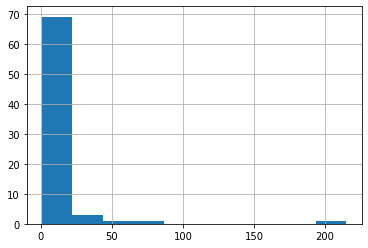

In [154]:
# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

**Matrix multiplication**

<img src="image/85.PNG" width="500" height="100">

Image of a tall rectangular matrix being multiplied by a wide rectangular matrix When multiplying an 10 x 30 matrix by a 30 x 40 matrix, what size matrix is generated?

## Matrix factorization
### Why this helps with sparse matrices

A huge benefit of this, when performed in conjunction with recommendation systems, is that factors can be found as long as there is at least one value in every row and column. Or in other words every user has given at least one rating, and every item has been rated at least once. Why is this valuable? Because we can multiply these factors together to create a fully filled in matrix.
<img src="image/72.PNG" width="500" height="100">

### What matrix factorization looks like

Matrix factorization breaks a matrix into two component matrices. Take a rating matrix with M users as rows and the N items they rated as the columns. Matrix factorization will break this down into one matrix with its depth equal to the number of users and one matrix with its width equal to the number of items.
The number of values in the newly created dimensions shown here are called the rank of the matrix and must be equal to each other and can be decided by us. These new unlabeled columns and rows are called latent features. These are the features that the matrix factorization view as mathematically the best ways to describe or sum up this dataset in the least number of features.

<img src="image/74.PNG" width="500" height="100">

### Latent features
To explain what that entails, let's take a closer look at a small example. Here we see four users and how they have rated six books and the decomposed version of the ratings matrix. You can see that the original matrix has six columns but the first matrix that is a factor only has two columns.

Taking a look at latent feature 1, we can see that users who gave high ratings to horror and fantasy books got relatively high values for this feature, while for latent feature 2, a high value appears to correspond with users who preferred romance novels. This is a simplified example, and often latent features become harder to label with larger datasets, but these are features that the matrix factorization has calculated as representing patterns in the original matrix.


<img src="image/75.PNG" width="500" height="100">

### Information loss
One question that might come to mind when you see these large DataFrames being reduced to much smaller factor matrices is, how can it do this without losing information? In reality, you can't reduce down these matrices without at least some information loss - these factors are just close approximations of the original data. If we were to multiply the factors back together
we would actually see a slight difference between the first and last matrix. Even the values we had originally may be off by a small fraction. 
<img src="image/76.PNG" width="500" height="100">


<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">


In [156]:
original_df=pd.read_csv('original_df.csv')
original_df

,Unnamed: 0,Alien,Scream,Love Actually,The Notebook
0,User_1,5,4,2,1
1,User_2,2,1,4,5
2,User_3,1,3,5,4
3,User_4,4,5,1,2
4,User_5,1,1,5,5


In [155]:
import numpy as np
import pandas as pd
user_matrix=np.array([[-3.9202913 ,  5.43628339],
                       [ 2.01738539,  6.37262296],
                       [ 1.46328822,  6.84850675],
                       [-3.88683688,  5.47272837],
                       [ 3.00873893,  6.54960159]])
user_matrix

array([[-3.9202913 ,  5.43628339],
       [ 2.01738539,  6.37262296],
       [ 1.46328822,  6.84850675],
       [-3.88683688,  5.47272837],
       [ 3.00873893,  6.54960159]])

Based on the values in the first column of the `user_matrix`, what do you think the latent feature may be summarizing?

**Exercise:** Inspect the same original pre-factorization DataFrame from the last exercise loaded as `original_df`, and compare it to the product of its two factors, `user_matrix` and `item_matrix`.

In [160]:
import numpy as np

item_matrix=np.array([[-0.31315676,  0.27223577,  0.11236206, -0.6851852 ,  0.58797665],
       [ 0.53506273, -0.67846698,  0.34679691, -0.33676863,  0.14038957],
       [-0.58681644, -0.56753532,  0.01699735,  0.40147032,  0.41482863],
       [ 0.34689509,  0.37669009,  0.48522268,  0.50094181,  0.50138271]])

user_matrix=np.array([[-0.92214831,  0.46868881, -3.93546218,  6.20017019],
       [ 0.29451291,  1.1337195 ,  2.00684562,  7.52205181],
       [-0.23338272, -1.58223229,  1.42823577,  7.4428733 ],
       [ 0.93640606, -0.2676827 , -3.90282275,  6.23040608],
       [-0.07751554,  0.26188815,  2.99513239,  7.67609853]])

# Multiply the user and item matrices
predictions_df = np.dot(user_matrix, item_matrix)
# Inspect the recreated DataFrame
print(predictions_df)

# Inspect the original DataFrame and compare
print(original_df)

[[4.99975739 4.00002482 3.00049612 1.9999559  0.99971309]
 [1.94609518 1.00551231 4.11024369 3.99020215 4.93625285]
 [0.97027582 3.00303961 3.06079052 4.99459728 3.96484857]
 [4.01506891 4.99845908 2.96918167 1.00273896 2.01782031]
 [1.06960907 0.99288186 3.85763861 5.01265224 5.08231879]]
  Unnamed: 0  Alien  Scream  Love Actually  The Notebook
0     User_1      5       4              2             1
1     User_2      2       1              4             5
2     User_3      1       3              5             4
3     User_4      4       5              1             2
4     User_5      1       1              5             5


## Singular value decomposition (SVD)
### What SVD does
Singular value decomposition finds factors for your matrix.
U is the user matrix V transpose is the features matrix (transpose in this case means that V has been flipped over its diagonal, but we do not need to worry about that here) but it also generates sigma as seen here, which is simply a diagonal matrix which can be thought of as the weights of the latent features, or how large an impact they are calculated to have.

<img src="image/77.PNG" width="500" height="100">

### Prepping our data

```python
print(book_ratings_df.shape)
```
answer:
`(220, 500)`

```python
avg_ratings = book_ratings_df.mean(axis=1)
print(avg_ratings)

answer:
array([[4.5 ],
[3.5],
[2.5],
[3.5],
...
[2.2]])
```

```python
user_ratings_pivot_centered = user_ratings_df.sub(avg_ratings, axis=0)
user_ratings_df.fillna(0, inplace=True)
print(user_ratings_df)
```
<img src="image/52.PNG" width="500" height="100">

### Applying SVD
```python
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_ratings_pivot_centered)
print(U.shape)
```
amswer:
`(610, 6)`
```python
print(Vt.shape)
```
answer:
`(6, 1000)`

```python
print(sigma)
```
`[3.0, 4.8, -12.6, -3.8, 8.2, 7.3]`

```python
sigma = np.diag(sigma)
print(sigma)

answer:
array([ 3.0 , 0. , 0. , 0. , 0. , 0. ],
[ 0. , 4.8 , 0. , 0. , 0. , 0. ],
[ 0. , 0. , -12.6 , 0. , 0. , 0. ],
[ 0. , 0. , 0. , -3.8 , 0. , 0. ],
[ 0. , 0. , 0. , 0. , 8.2 , 0. ],
[ 0. , 0. , 0. , 0. , 0. , 7.3 ]),
```
### Getting the final matrix
<img src="image/78.PNG" width="500" height="100">

### Calculating the product in Python
```python
recalculated_ratings = np.dot(np.dot(U, sigma), Vt)
print(recalculated_ratings)

answer:
[[ 0.1 -0.9 -3.6. ... ]
[ -2.3 0.5 -0.5 ... ]
[ 0.5 -0.5 2.0 ... ]
[ ... ... ... ... ]]
```
### Add averages back
```python
recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1, 1)
print(recalculated_ratings)

answer:
[[ 4.6 3.6 0.9 ... ]
[ 1.8 4.0 3.0 ... ]
[ 3.0 2.0 4.5 ... ]
[ ... ... ... ... ]]

print(book_ratings_df)

answer:
[[ 5.0 4.0 NA ... ]
[ NA 4.0 3.0 ... ]
[ 3.0 2.0 NA ... ]
[ ... ... ... ... ]]
```

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

**Exercise:** Begin prepping the movie rating DataFrame you have been working with in order to be able to perform Singular value decomposition.

In [189]:
# Fill in all missing values with 0s
user_ratings_df.fillna(0, inplace=True)
user_ratings_df

title,"13th Warrior, The (1999)","Abyss, The (1989)",Aladdin (1992),Alice in Wonderland (1951),Alien (1979),Apocalypse Now (1979),Austin Powers: International Man of Mystery (1997),Bambi (1942),Basic Instinct (1992),Batman (1989),...,"Three Musketeers, The (1993)",Tommy Boy (1995),Toy Story (1995),Toys (1992),"Usual Suspects, The (1995)",Wild Things (1998),Willow (1988),Willy Wonka & the Chocolate Factory (1971),X-Men (2000),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Exercise:** Break the `user_ratings_df` data you generated in the last exercise into 3 factors: `U`, `sigma`, and `Vt`.

**Exercise:** Use numpy's dot product function to multiply `U` and `sigma` first, then the result by `Vt`. You will then be able add the average ratings for each row to find your final ratings.

In [188]:
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_df)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[21.70829335  0.          0.          0.          0.          0.        ]
 [ 0.         24.58149711  0.          0.          0.          0.        ]
 [ 0.          0.         26.82815685  0.          0.          0.        ]
 [ 0.          0.          0.         29.75315109  0.          0.        ]
 [ 0.          0.          0.          0.         35.28455753  0.        ]
 [ 0.          0.          0.          0.          0.         58.77499468]]


In [190]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(original_df)

title     13th Warrior, The (1999)  Abyss, The (1989)  Aladdin (1992)  \
userId                                                                  
user_1                         4.0                4.0             4.0   
user_10                        1.0                1.0             1.0   
user_100                       3.5                3.5             3.5   
user_101                       4.0                4.0             4.0   
user_102                       5.0                5.0             5.0   
...                            ...                ...             ...   
user_95                        5.0                5.0             5.0   
user_96                        5.0                5.0             5.0   
user_97                        5.0                5.0             5.0   
user_98                        4.5                4.5             4.5   
user_99                        5.0                5.0             5.0   

title     Alice in Wonderland (1951)  Alien (1979)

**Exercise:** Using calc_pred_ratings_df that you generated in the last exercise, with all rows and columns filled, find the movies that User_5 is most likely to enjoy.

In [199]:
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['user_102',:].sort_values(ascending=False)

print(user_5_ratings.head())

title
Star Wars: Episode IV - A New Hope (1977)    5.0
Braveheart (1995)                            5.0
Usual Suspects, The (1995)                   5.0
Zombieland (2009)                            5.0
Forrest Gump (1994)                          5.0
Name: user_102, dtype: float64


## Validating your predictions
### Hold-out sets
What makes recommendation engines a little different when measuring predictions is that in more traditional machine learning models, you are trying to predict a single feature or column, but with recommendation engines, what you are trying to predict is far more inconsistent.
Almost every user has reviewed different items, and each item has received reviews from different groups of users.
For this reason, we cannot split our holdout set in the same way that we can for typical machine learning. In those cases, we would just split off a proportion of the row and use them to test our predictions as you see on the left.
For recommendation engines, on the other hand, we need to remove a different chunk of the DataFrame, as seen on the right.

<img src="image/79.PNG" width="500" height="100">
<img src="image/80.PNG" width="500" height="100">

### Separating the hold-out set
```python
actual_values = act_ratings_df.iloc[:20, :100].values
act_ratings_df.iloc[:20, :100] = np.nan
```
Generate predictions as before.
```python
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values
```

### Masking the hold-out set
```python
mask = ~np.isnan(actual_values)
print(actual_values[mask])
```
answer:
`[4. 4. 5. 3. 3. ...]`

```python
print(predicted_values[mask])```

answer:
`[3.76, 4.35, 4.95, 3.5869079 3.686337 ...]`

### Introducing RMSE (root mean squared error)
The metric most commonly used to measure how good a model is at predicting a recommendation is called root mean square error or RMSE for short.
With RMSE, we first calculate how far from the ground truth each prediction was (this is the error part in RMSE).
We then square this as we only care about how wrong it is, not in what direction.
We then find the average square error.
This gives us a good measure of how close a set of predictions are to the actual values, and is very useful to compare between models.
<img src="image/81.PNG" width="500" height="100">
<img src="image/82.PNG" width="500" height="100">

<img src="https://i1.wp.com/www.firstplaceforhealth.com/wp-content/uploads/2020/03/train-your-brain-gif-2.gif?fit=1200%2C904&ssl=1" width="300" height="100">

### RMSE in Python

```python
from sklearn.metrics import mean_squared_error
print(mean_squared_error(actual_values[mask],
predicted_values[mask],
squared=False))
```
answer:
`3.6223997`

**Exercise: Calculating RMSE**
The following data has been loaded in the DataFrame predictions. Either manually, or using the Python console, calculate what the root mean square error (RMSE) of these predictions is.

<img src="image/86.PNG" width="500" height="100">
